# CSCA 5622 Supervised Learning Final Project

## Introduction
For this project, my goal is to analyze various factors that impact high school students' Grade Point Average (GPA). To do so, I will develop a supervised regression model that can estimate a student's GPA based on the most significant factors. I am very interested in learning what factors are important in achieving a higher GPA. When I was in high school, I did not study very much, and in turn my GPA was not great. So, I predict that study time will be the most impactful feature in estimating GPA. I will begin with some EDA to visualize the dataset and see the relationships between the features. Then, I will develop a model using linear regression and ADAboost to predict the GPA.


The dataset I am using is [Students Performance Dataset](https://www.kaggle.com/datasets/rabieelkharoua/students-performance-dataset/data).
The link to my github repository is [CSCA5622 Final](https://github.com/l2chu/CSCA5622_final)

## Import Libraries

In [1]:
import scipy as sp
import scipy.stats as stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
sns.set()
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

# pip install matplotlib==3.7.3
%matplotlib inline

## Data Analysis and Cleanup

In [3]:
df = pd.read_csv('Student_performance_data.csv')
df.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


Get the details of the database to check for null values and to see if any of the feature types are not numerical.

In [4]:
# checking for null values and seeing if any feature types are not numerical
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   int64  
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   int64  
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   float64
dtypes: float64(3), int64(12)
memory usage: 280.4 KB
None


It looks like there are a total of 2392 students (or rows) and three features are float type while the rest are integer types. There are also no null values for any of the features, so there is no need to dropna. 

After getting the details, I check for any duplicate rows.

In [5]:
# check for duplicate rows
duplicates = df.duplicated().sum()
print("Number of duplicate rows:", duplicates)

Number of duplicate rows: 0


Let's drop the ID column and convert the GradeClass feature to integer type, since the values are $GradeClass ∈ {1,2,3,4}$

In [6]:
# drop id column
df = df.drop(['StudentID'],axis=1)
# convert float type to int
df['GradeClass'] = df['GradeClass'].astype(int)
df.head()

,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2
1,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1
2,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4
3,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3
4,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4


## EDA

Let's plot the correlation matrix in a heatmap and pairplot.

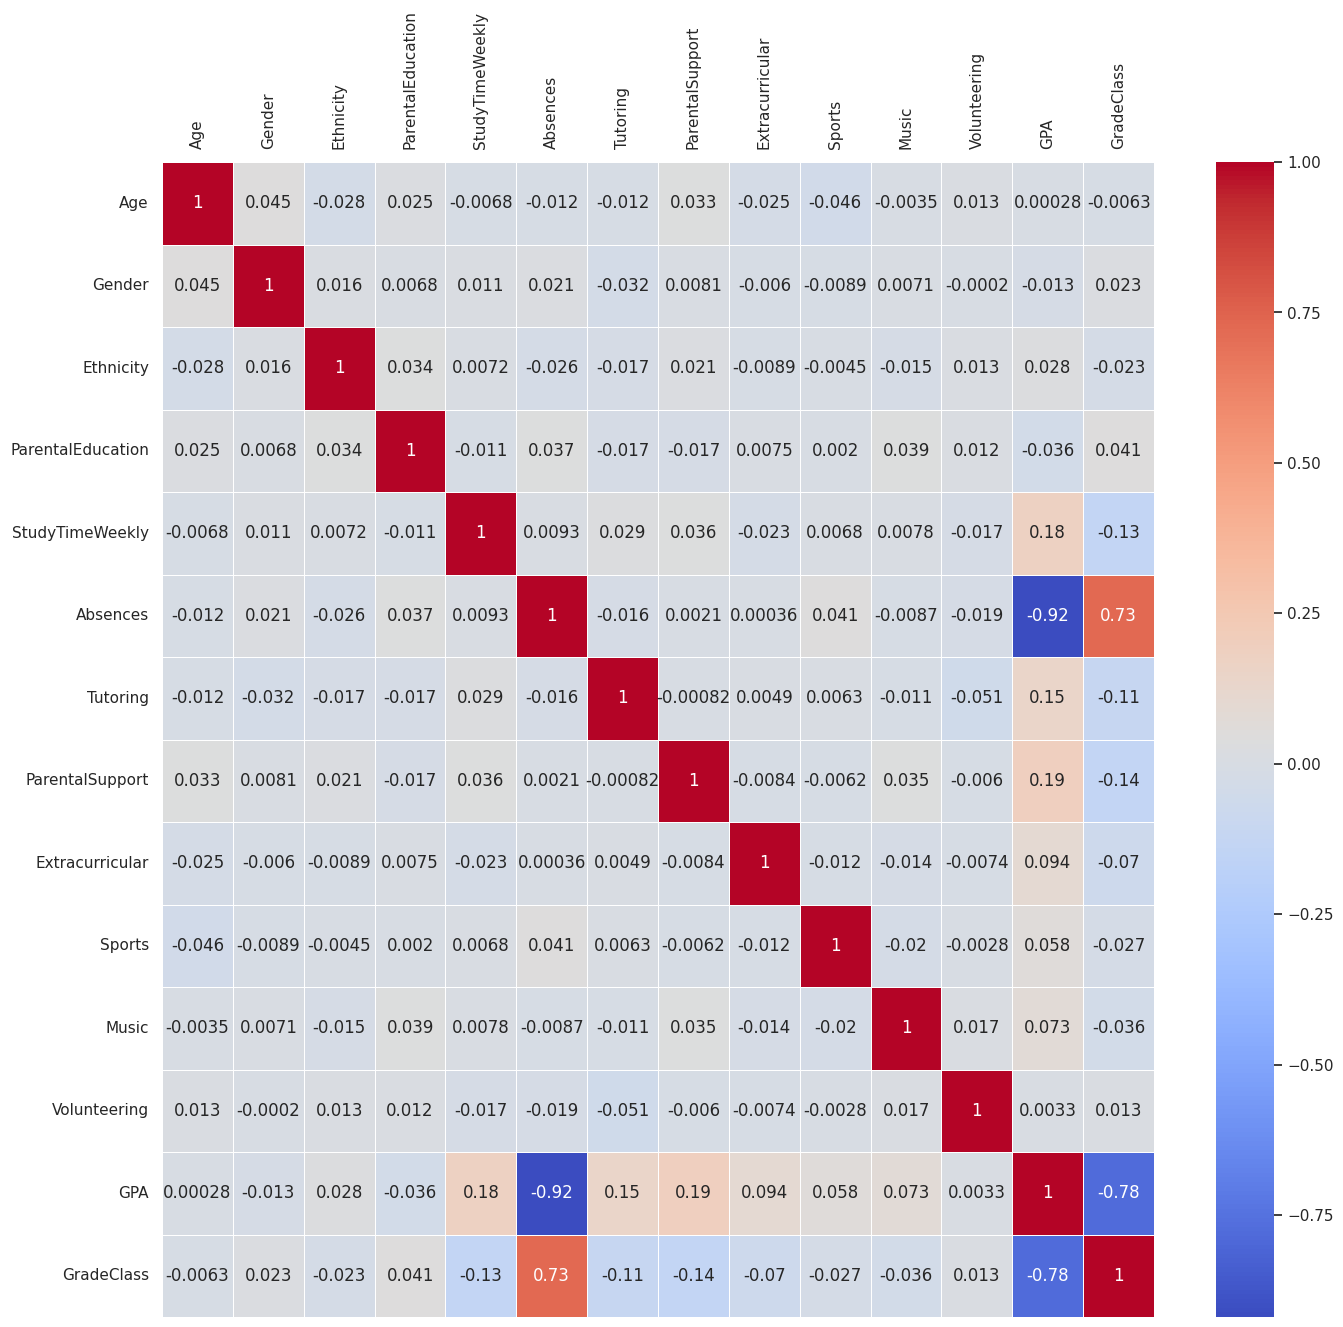

In [7]:
fig, ax = plt.subplots(figsize=(16,15))
ax.tick_params(labelbottom=False,labeltop=True)
ax = sns.heatmap(df.corr(),linewidths=.5,cbar=True,annot=True,ax=ax,cmap="coolwarm")

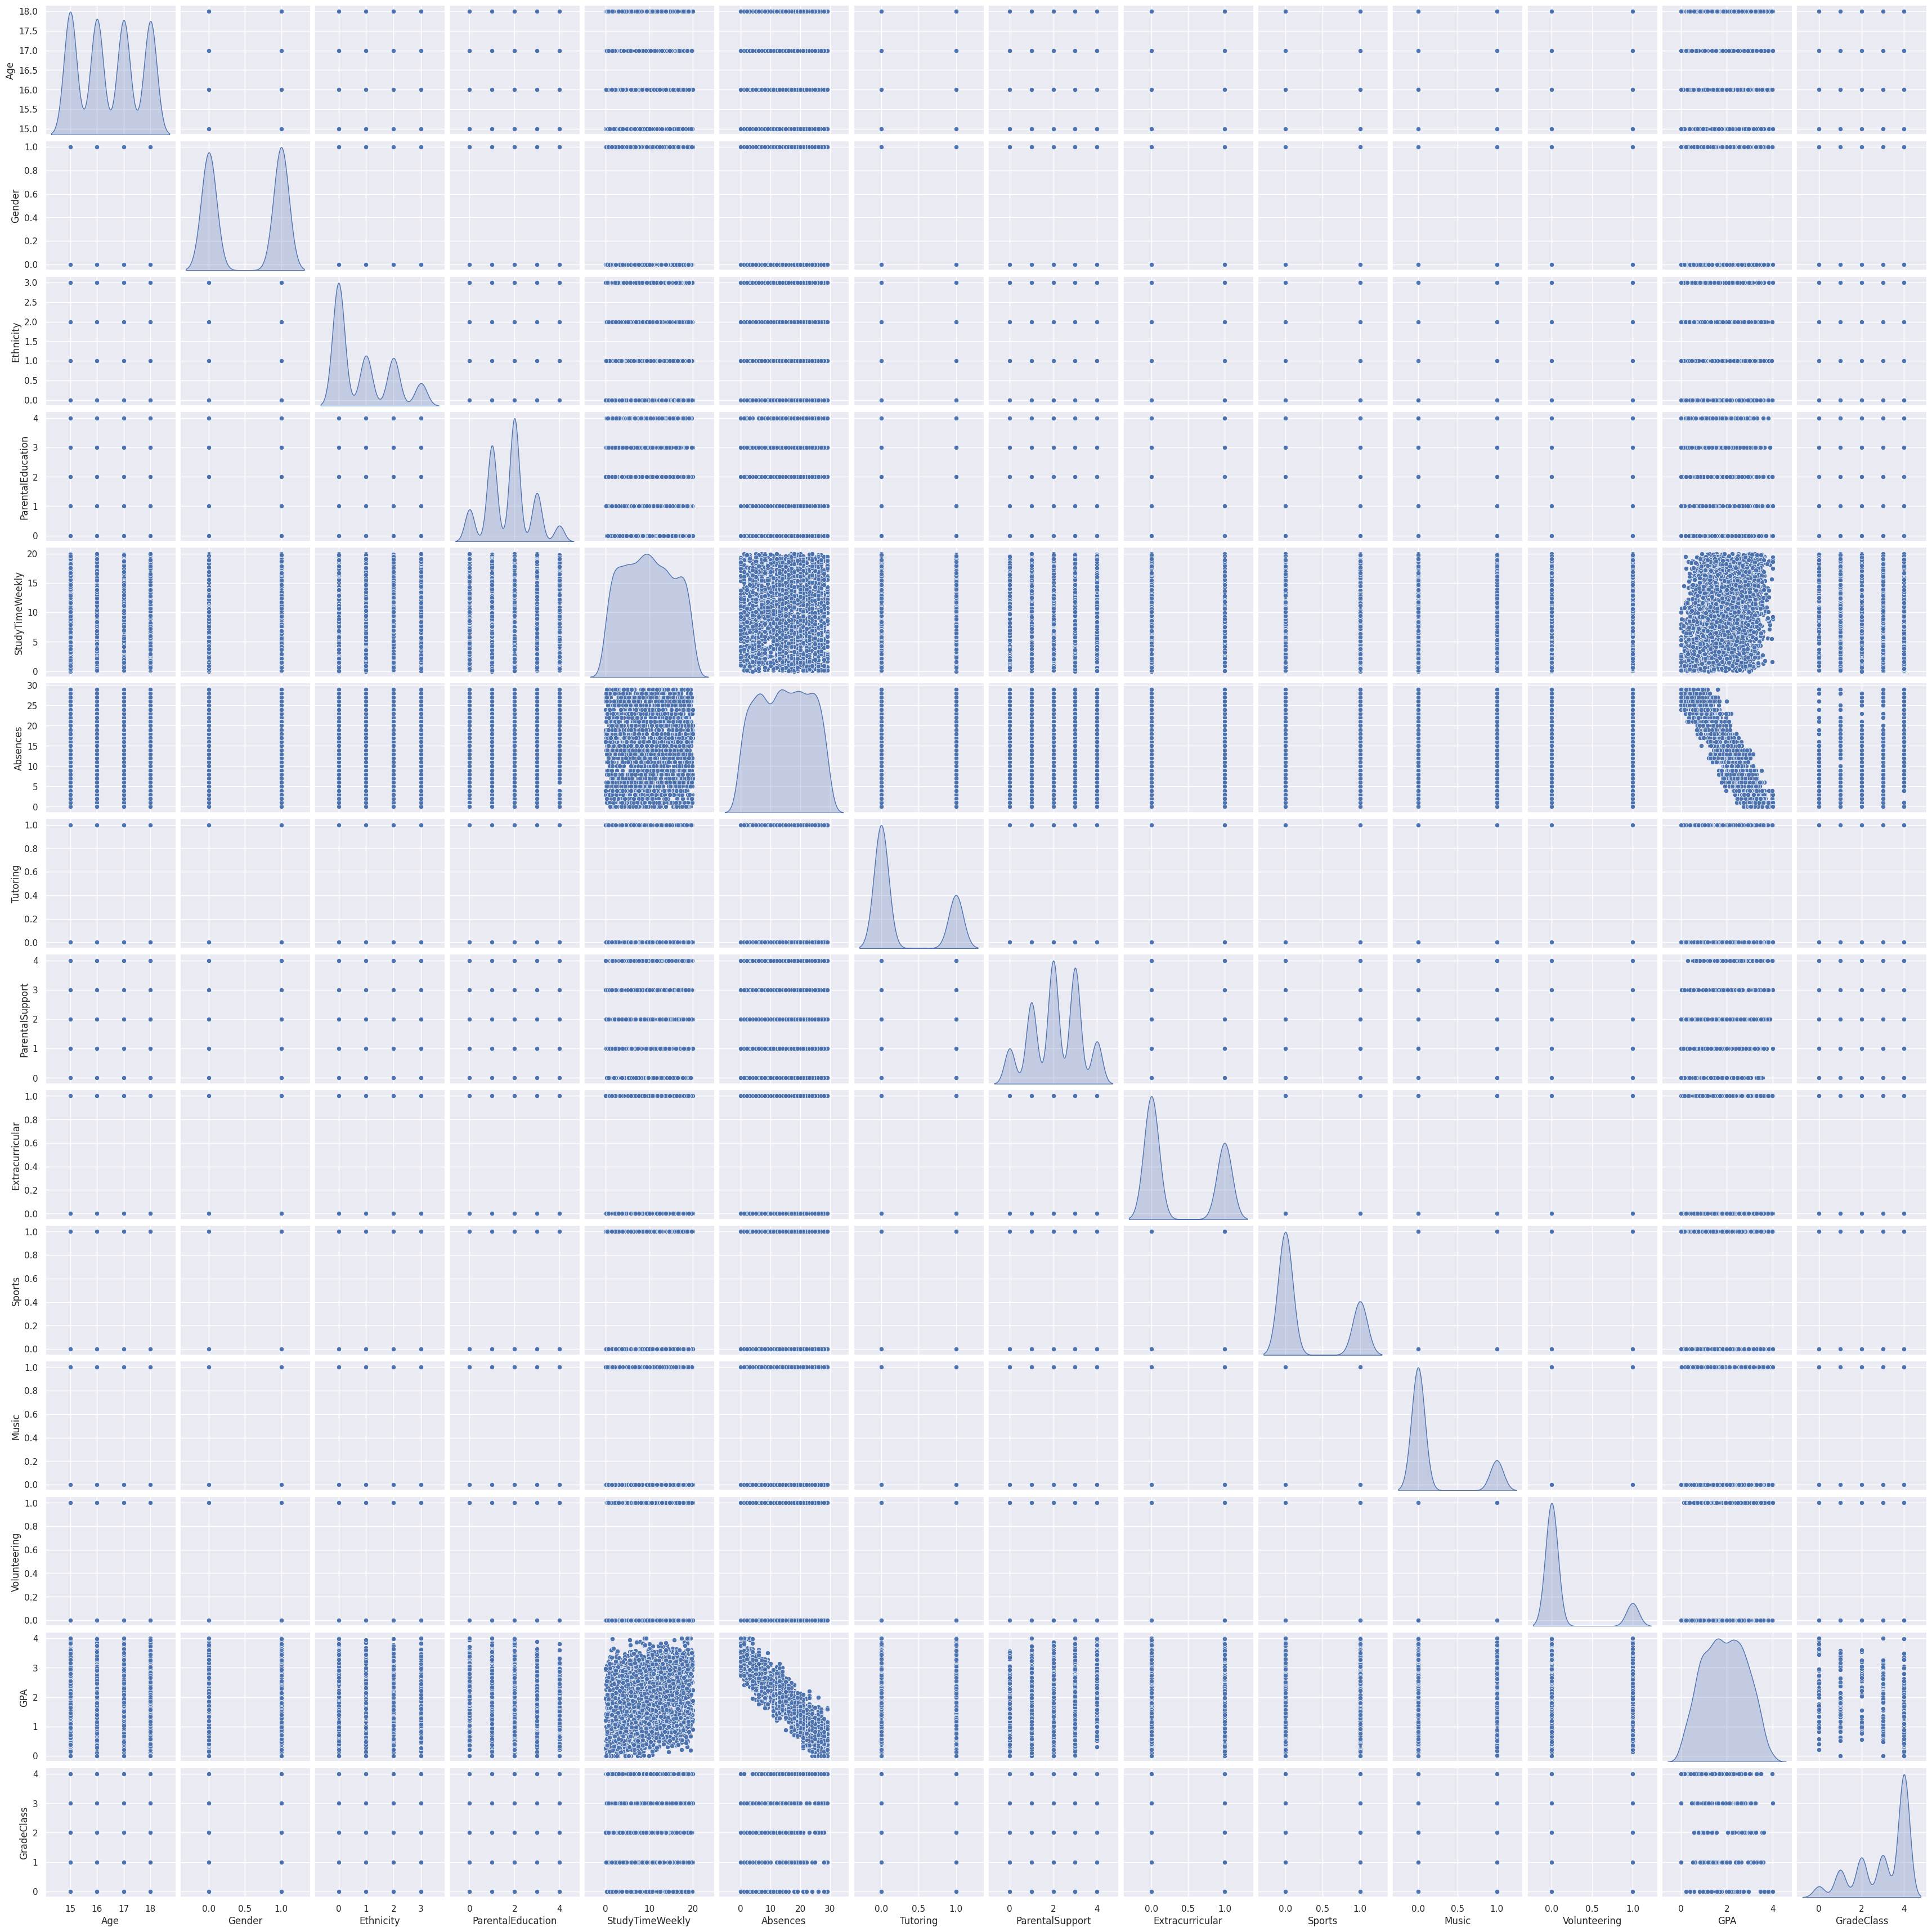

In [8]:
sns.pairplot(df, diag_kind='kde')

Looking at the pairplot and correlation heatmap, there is a high correlation between attendance and GPA. This shows that the most significant feature is going to be attendance.

The kde plots in the diagonal part of the pairplot represents a graph of the each feature and the values of those features. SinceStudy time, Absence, and GPA are all float values, the graph looks more smoothed out and rounded. The other features are integer values, most being binary, 0 or 1. Since these are binary, a KDE plot is not the ideal plot to use to visualize the data, so here, I plotted the integer features using a histogram.

Text(0.5, 0.98, 'Histograms of Integer Features')

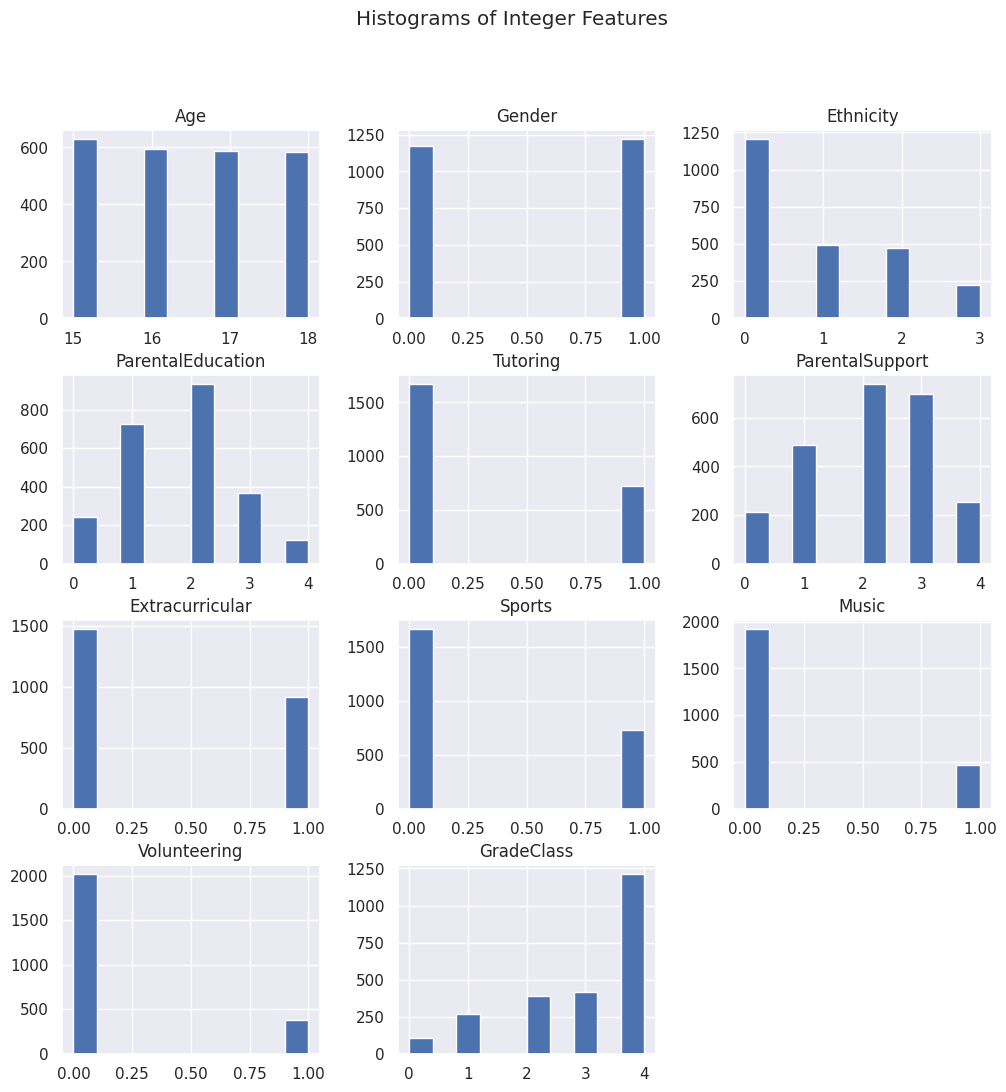

In [9]:
df_int = df.drop(columns=['StudyTimeWeekly','Absences','GPA'])
df_int.hist(figsize=(12,12))
plt.suptitle('Histograms of Integer Features')

These histograms help us visualize the spread of our dataset. Age and Gender have pretty even distribution. However, we can see Ethnicity is pretty lopsided, with more datapoints with Caucasion ethnicities. 

To more accurately depict the features absences and study time, I normalized the data by dividing each value by the maximum as stated in the documentation of the dataset.

In [10]:
#normalize absences and study time
df['absences_norm'] = df['Absences']/30
df['study_time_norm'] = df['StudyTimeWeekly']/20
df_norm = df.drop(columns=['Absences','StudyTimeWeekly'])
print(df_norm.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                2392 non-null   int64  
 1   Gender             2392 non-null   int64  
 2   Ethnicity          2392 non-null   int64  
 3   ParentalEducation  2392 non-null   int64  
 4   Tutoring           2392 non-null   int64  
 5   ParentalSupport    2392 non-null   int64  
 6   Extracurricular    2392 non-null   int64  
 7   Sports             2392 non-null   int64  
 8   Music              2392 non-null   int64  
 9   Volunteering       2392 non-null   int64  
 10  GPA                2392 non-null   float64
 11  GradeClass         2392 non-null   int64  
 12  absences_norm      2392 non-null   float64
 13  study_time_norm    2392 non-null   float64
dtypes: float64(3), int64(11)
memory usage: 261.8 KB
None


## Linear Regression Analysis

Since regression predicts values, I will use GPA as the target variable and drop GradeClass, because they represent the same thing.

In [11]:
lin = df_norm.drop(columns=['GradeClass'])
print(lin.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                2392 non-null   int64  
 1   Gender             2392 non-null   int64  
 2   Ethnicity          2392 non-null   int64  
 3   ParentalEducation  2392 non-null   int64  
 4   Tutoring           2392 non-null   int64  
 5   ParentalSupport    2392 non-null   int64  
 6   Extracurricular    2392 non-null   int64  
 7   Sports             2392 non-null   int64  
 8   Music              2392 non-null   int64  
 9   Volunteering       2392 non-null   int64  
 10  GPA                2392 non-null   float64
 11  absences_norm      2392 non-null   float64
 12  study_time_norm    2392 non-null   float64
dtypes: float64(3), int64(10)
memory usage: 243.1 KB
None


### Forward Stepwise Refinement

I will use forward stepwise refinement to find the most significant features to least significant. From the EDA analysis, we can predict that absences should be the most significant factor.

In [12]:
#split data for forward stepwise refinement
train_lin, test_lin = train_test_split(lin,train_size=.8,random_state=10)


In [52]:
def find_best_feature(previous_best,form,cols,first=False):
    """
    Finds the next best feature

    :param previous_best: str, the previous best feature
    :param form: str, the form to keep adding the best features to
    :param cols: list of strs, the remaining list of features to select from
    :param first: bool, default to False, True if it is the first iteration

    Returns:

    best_predictor: str, the next best feature
    train_r2: the adjusted r2 for the training model
    test_r2: the adjusted r2 for the test model
    """
    best_r2 = -1
    best_predictor = ''
    if not first:
        cols.remove(previous_best)
        form+= f'{previous_best} +'

    print(form)
    for col in cols:
        model = smf.ols(formula=f'{form}{col}',data=train_lin).fit()
        adjr2 =model.rsquared_adj
    
        if adjr2 > best_r2:
            best_predictor = col
            best_r2 = adjr2
    
    train_clf = smf.ols(formula=f'{form}{best_predictor}', data=train_lin).fit()
    test_clf = smf.ols(formula=f'{form}{best_predictor}', data=test_lin).fit()
    train_r2 = train_clf.rsquared_adj
    test_r2 = test_clf.rsquared_adj
    print('best predictor:',best_predictor)
    print('best r2:',best_r2)
    
    return best_predictor, train_r2, test_r2,form

In [14]:
cols = list(lin.columns)
cols.remove('GPA') #remove the target variable
col_len = len(cols)

adjr2_train =[]
adjr2_test =[]
best_features = []
form = 'GPA ~'

# first iteration k=1
print("k:",1)
best_feature, train_r2, test_r2, new_form = find_best_feature('GPA',form,cols,first=True)
best_features.append(best_feature)
adjr2_train.append(train_r2)
adjr2_test.append(test_r2)

#iterate through all k's
for k in range(2,col_len+1):
    print('\nk:',k)
    best_feature, train_r2, test_r2, new_form = find_best_feature(best_feature,new_form,cols)
    best_features.append(best_feature)
    adjr2_train.append(train_r2)
    adjr2_test.append(test_r2)


k: 1
GPA ~
best predictor: absences_norm
best r2: 0.8461036047020207

k: 2
GPA ~absences_norm +
best predictor: ParentalSupport
best r2: 0.8823184837933109

k: 3
GPA ~absences_norm +ParentalSupport +
best predictor: study_time_norm
best r2: 0.9146765964512696

k: 4
GPA ~absences_norm +ParentalSupport +study_time_norm +
best predictor: Tutoring
best r2: 0.9313316592001409

k: 5
GPA ~absences_norm +ParentalSupport +study_time_norm +Tutoring +
best predictor: Extracurricular
best r2: 0.9411997231760179

k: 6
GPA ~absences_norm +ParentalSupport +study_time_norm +Tutoring +Extracurricular +
best predictor: Sports
best r2: 0.9505034365128509

k: 7
GPA ~absences_norm +ParentalSupport +study_time_norm +Tutoring +Extracurricular +Sports +
best predictor: Music
best r2: 0.9547592687354578

k: 8
GPA ~absences_norm +ParentalSupport +study_time_norm +Tutoring +Extracurricular +Sports +Music +
best predictor: Age
best r2: 0.954782870808121

k: 9
GPA ~absences_norm +ParentalSupport +study_time_norm +

So here is the listed order of features from most significant to least significant:

In [15]:
for i in range(len(best_features)):
    print(f'{i+1}.', best_features[i])

1. absences_norm
2. ParentalSupport
3. study_time_norm
4. Tutoring
5. Extracurricular
6. Sports
7. Music
8. Age
9. Gender
10. Ethnicity
11. Volunteering
12. ParentalEducation


Here is the plot of the training adjusted r2 versus the test adjusted r2 with respect to k:

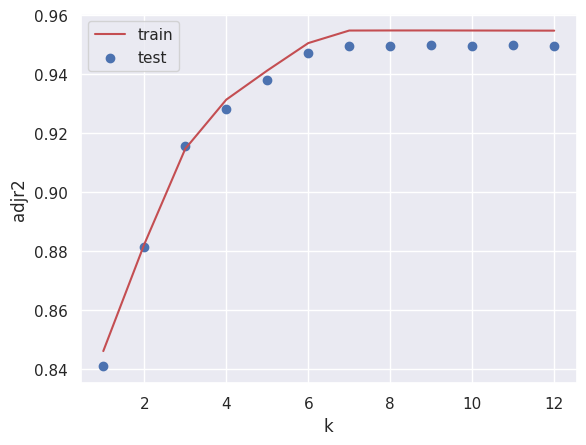

In [16]:
k=range(1,13)
plt.plot(k,adjr2_train,'r', label='train')
plt.scatter(k,adjr2_test, label='test')
plt.xlabel("k")
plt.ylabel("adjr2")
plt.legend()

Observing the graph, k=7 has the best test adjusted r2 because as k increased after that, the adjusted r2 plateaued. Since the simpler model, the better, I chose k=7. I printed out the model summary for k=7.

In [17]:
# k=7 is the best model, lets see the summary

# get form from the output
form='GPA ~absences_norm +ParentalSupport +study_time_norm +Tutoring +Extracurricular +Sports +Music'
clf7 = smf.ols(formula=form, data=test_lin).fit()
print(clf7.summary())

                            OLS Regression Results                            
Dep. Variable:                    GPA   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                     1284.
Date:                Thu, 22 Aug 2024   Prob (F-statistic):          3.29e-302
Time:                        19:11:55   Log-Likelihood:                 89.579
No. Observations:                 479   AIC:                            -163.2
Df Residuals:                     471   BIC:                            -129.8
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           2.5170      0.031     

### Multilinear Regression
Let us see if we can improve on this model by introducing interactions within the 7 most significant features.

In [18]:
# lets make the interactions between these 7 features
k=7
bestk_features=best_features[:7]

# add the target variable to get a subset of the dataframe with just k features
best_GPA = ['GPA'] + bestk_features
lin_interact= lin[best_GPA].copy()

#iterate through bestk_features to get all interactions added to dataframe
for i in range(len(bestk_features)-1):
    for j in range(i+1,len(bestk_features)):
        feature_i =bestk_features[i]
        feature_j = bestk_features[j]
        lin_interact[f'{feature_i}:{feature_j}'] = lin[f'{feature_i}']*lin[f'{feature_j}']

# print new datafram with all interactions
print(lin_interact.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 29 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   GPA                              2392 non-null   float64
 1   absences_norm                    2392 non-null   float64
 2   ParentalSupport                  2392 non-null   int64  
 3   study_time_norm                  2392 non-null   float64
 4   Tutoring                         2392 non-null   int64  
 5   Extracurricular                  2392 non-null   int64  
 6   Sports                           2392 non-null   int64  
 7   Music                            2392 non-null   int64  
 8   absences_norm:ParentalSupport    2392 non-null   float64
 9   absences_norm:study_time_norm    2392 non-null   float64
 10  absences_norm:Tutoring           2392 non-null   float64
 11  absences_norm:Extracurricular    2392 non-null   float64
 12  absences_norm:Sports

With this new dataframe with all the interactions, we use it to create a new linear regression model.

In [19]:
# create linear regression model with interactions
#split train and test data
train_interact, test_interact = train_test_split(lin_interact,train_size=.8,random_state=10)

interact_cols = list(lin_interact.columns)
interact_cols.pop(0) # get rid of GPA, the dependent variable
form = 'GPA ~'
for col in interact_cols:
    form+=f'+ {col}'

clf_interact = smf.ols(formula=form, data=train_interact).fit()
clf_test_interact = smf.ols(formula=form, data=test_interact).fit()
print(clf_test_interact.summary())

                            OLS Regression Results                            
Dep. Variable:                    GPA   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     331.2
Date:                Thu, 22 Aug 2024   Prob (F-statistic):          2.60e-280
Time:                        19:11:55   Log-Likelihood:                 107.01
No. Observations:                 479   AIC:                            -156.0
Df Residuals:                     450   BIC:                            -35.04
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

Observing the Model Summary, we see that there are many interactions that are insignificant, with $p > 0.05$. So the next step is to remove the interactions and features that are insignificant.

In [20]:
drop_cols = []
max_pval = 0.05
for feature in interact_cols:
    if clf_test_interact.pvalues[f'{feature}'] > max_pval:
        drop_cols.append(feature)

lin_interact_dropped = lin_interact.drop(columns=drop_cols,axis=1)

In [21]:
interact_cols = list(lin_interact_dropped.columns)
print(interact_cols)

['GPA', 'absences_norm', 'ParentalSupport', 'study_time_norm', 'Tutoring', 'Extracurricular', 'Sports', 'absences_norm:Music', 'ParentalSupport:Music', 'Tutoring:Extracurricular']


It looks like the feature Music has been dropped, which means the interactions with Music need to be removed as well, absences_norm:Music and ParentalSupport:Music.

In [22]:
remove_interactions = ['absences_norm:Music', 'ParentalSupport:Music']
new_cols = [e for e in interact_cols if e not in remove_interactions]
print(new_cols)

['GPA', 'absences_norm', 'ParentalSupport', 'study_time_norm', 'Tutoring', 'Extracurricular', 'Sports', 'Tutoring:Extracurricular']


In [23]:
lin_interact_new_dropped = lin_interact[new_cols].copy()
# print(lin_interact_new_dropped.columns)
train_interact_drop, test_interact_drop = train_test_split(lin_interact_new_dropped,train_size=.8,random_state=10)
new_cols.pop(0)
form = 'GPA ~'

for col in new_cols:
    form+=f'+ {col}'
# print(form)
final_model_train = smf.ols(formula=form, data=train_interact_drop).fit()
final_model_test = smf.ols(formula=form, data=test_interact_drop).fit()
print(final_model_test.summary())

                            OLS Regression Results                            
Dep. Variable:                    GPA   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                     1228.
Date:                Thu, 22 Aug 2024   Prob (F-statistic):          7.63e-298
Time:                        19:11:55   Log-Likelihood:                 79.353
No. Observations:                 479   AIC:                            -142.7
Df Residuals:                     471   BIC:                            -109.3
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

Observing this model summary, it shows that the interaction Tutoring:Extracurricular is no significant enough to be part of the model. So we will remove it.

In [24]:
new_cols.remove('Tutoring:Extracurricular')
new_cols = ['GPA'] + new_cols
print(new_cols)

['GPA', 'absences_norm', 'ParentalSupport', 'study_time_norm', 'Tutoring', 'Extracurricular', 'Sports']


In [25]:
lin_interact_new_dropped = lin_interact[new_cols].copy()
# print(lin_interact_new_dropped.columns)
train_interact_drop, test_interact_drop = train_test_split(lin_interact_new_dropped,train_size=.8,random_state=10)
new_cols.pop(0)
form = 'GPA ~'

for col in new_cols:
    form+=f'+ {col}'
# print(form)
final_model_train = smf.ols(formula=form, data=train_interact_drop).fit()
final_model_test = smf.ols(formula=form, data=test_interact_drop).fit()
print(final_model_test.summary())

                            OLS Regression Results                            
Dep. Variable:                    GPA   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                     1427.
Date:                Thu, 22 Aug 2024   Prob (F-statistic):          7.94e-299
Time:                        19:11:55   Log-Likelihood:                 77.917
No. Observations:                 479   AIC:                            -141.8
Df Residuals:                     472   BIC:                            -112.6
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           2.5355      0.032     

Through the process of adding feature interactions, I removed the feature Music and added no interactions because they were all statistically insignificant. This caused the model's adjusted r2 value decrease from before we added interactions, which was not what I predicted.

## Second Model: AdaBoost Regression

For the second model, I chose AdaBoost regression because my dataset does not have too many features, and the values are not too dense, which means it will be a better choice than random forest.

In [37]:
#choosing boosting dt because not a lot of features and not too dense values 

y = lin['GPA'].values
X = lin.drop(columns=['GPA']).values

# create a model using default hyperparameters
adar = AdaBoostRegressor(random_state=0)

ada_x_train, ada_x_test, ada_y_train, ada_y_test = train_test_split(X,y,test_size=.20,random_state=0)
adar.fit(ada_x_train,ada_y_train)
yhat = adar.predict(ada_x_test)
print("AdaBoost Regressor with 50 estimators and maxDepth=3 and learning rate = 1")
print("score:",adar.score(ada_x_test,ada_y_test))

AdaBoost Regressor with 50 estimators and maxDepth=3 and learning rate = 1
score: 0.9162975654826752


Using default parameters, the AdaBoost model is already pretty good, let's now optimize the hyperparameters and see if we can improve the score.

In [38]:
from sklearn.model_selection import cross_val_score, GridSearchCV
#use gridsearch to optimize parameters
n_estimators = list(range(50, 500,50))
learning_rate = np.around(np.arange(0.1,4.1,.1),2).tolist()
estimators = [DecisionTreeRegressor(max_depth=depth) for depth in range(1,11)]
# print(n_estimators)
# print(learning_rate)
param_grid={
    'estimator':estimators,
    'n_estimators': n_estimators,
    'learning_rate': learning_rate
}
adar = AdaBoostRegressor(random_state=0)
grid = GridSearchCV(adar, param_grid, cv=5, n_jobs=-1)
grid.fit(ada_x_train,ada_y_train)

[50, 100, 150, 200, 250, 300, 350, 400, 450]
[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0, 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3.0, 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4.0]


GridSearchCV(cv=5, estimator=AdaBoostRegressor(random_state=0), n_jobs=-1,
             param_grid={'estimator': [DecisionTreeRegressor(max_depth=1),
                                       DecisionTreeRegressor(max_depth=2),
                                       DecisionTreeRegressor(max_depth=3),
                                       DecisionTreeRegressor(max_depth=4),
                                       DecisionTreeRegressor(max_depth=5),
                                       DecisionTreeRegressor(max_depth=6),
                                       DecisionTreeRegressor(max_depth=7),
                                       DecisionTreeRegressor(max_depth=8),
                                       DecisionTreeRegressor(max_depth=9),
                                       DecisionTreeRegressor(max_depth=10)],
                         'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7,
                                           0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4,
                                           1.5, 1.6, 1.7, 1.8, 1.9, 2.0, 2.1,
                                           2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8,
                                           2.9, 3.0, ...],
                         'n_estimators': [50, 100, 150, 200, 250, 300, 350, 400,
                                          450]})

In [39]:
print(f"Best parameters: {grid.best_params_}")
print(f"Best cross-val accuracy: {grid.best_score_:.3f}")

Best parameters: {'estimator': DecisionTreeRegressor(max_depth=6), 'learning_rate': 3.0, 'n_estimators': 400}
Best cross-val accuracy: 0.938


Using the best parameters from the grid search, let's calculate the score:

In [49]:
adar = AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=6),n_estimators=400,learning_rate=3.0,random_state=0)
adar.fit(ada_x_train,ada_y_train)
yhat = adar.predict(ada_x_test)
print("The optimized AdaBoost Regressor with 400 estimators and maxDepth = 6 and learning rate = 3.0")
score = adar.score(ada_x_test,ada_y_test)
print("Score:",score)

The optimized AdaBoost Regressor with 400 estimators and maxDepth = 6 and learning rate = 3.0
Score: 0.9394728561614069


After looking at the optimized hyperparameters, I want to visualize what the tree looks like to determine which feature Adaboost deems the most significant.

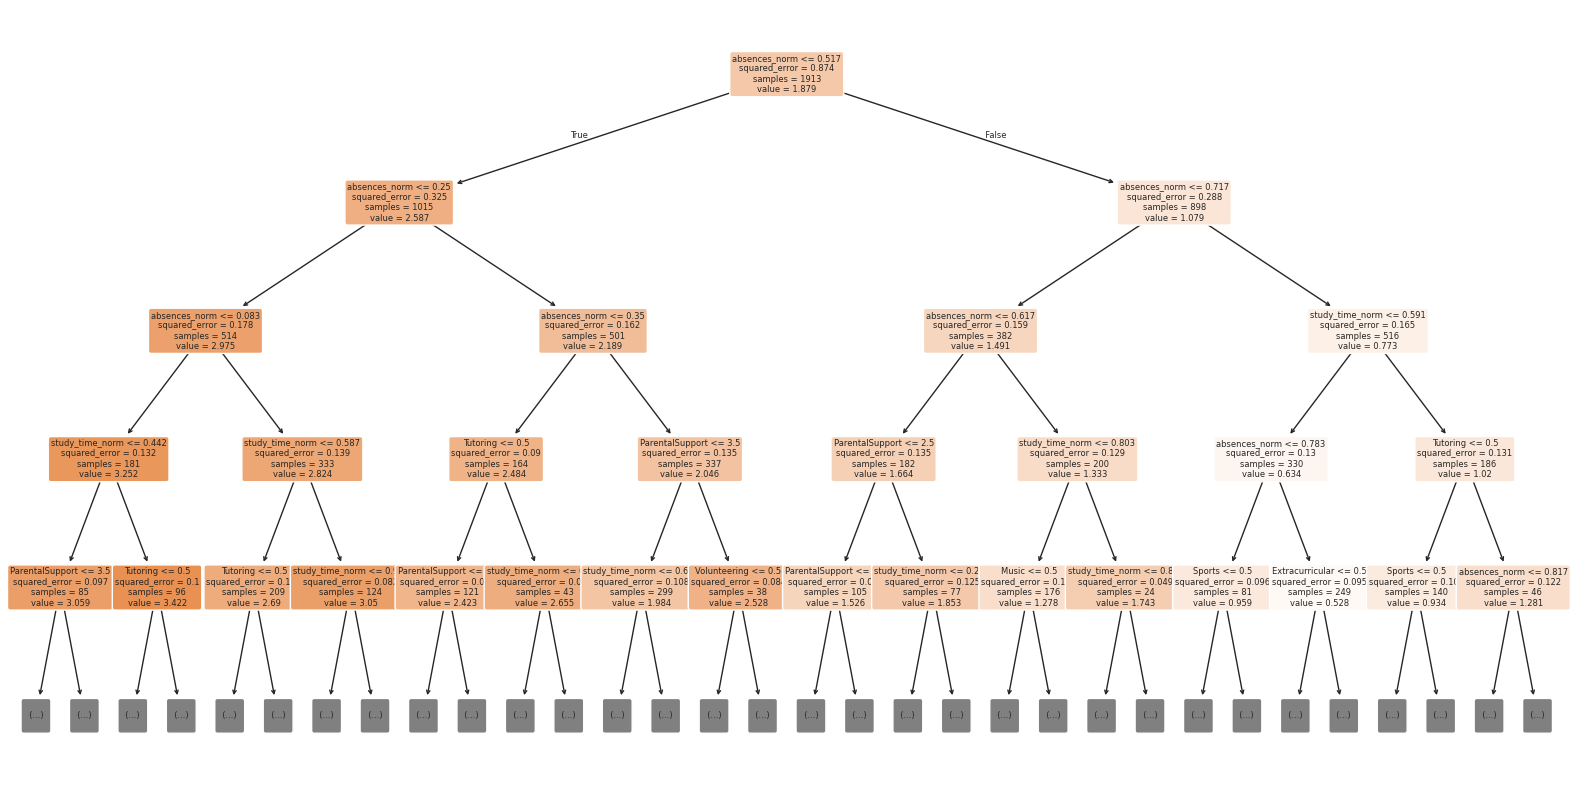

In [50]:
feature_names = list(lin.columns)
feature_names.remove('GPA')

plt.figure(figsize=(20,10))

tree.plot_tree(adar.estimators_[0], feature_names=feature_names,fontsize=6,filled=True, rounded=True,max_depth=4)
plt.show()

It looks like Adaboost also chose absences as the feature to do the first split.

# Conclusion
Linear Regression best adjusted r2: 0.949

AdaBoostRegression best score: 0.9394728561614069

The results show that the Linear Regression model was able to more accurately predict GPA using forward stepwise refinement compared to AdaBoostRegression. This is a huge surprise because I had anticipated that using boosting decision trees would have a better result. One hypothesis I have is that AdaBoost is generally used for classification, and not regression, so it might be as optimal as Linear Regression, which is used only for regression. Also, I could optimize the features, so I only put the significant features into the adaboost model.

My prediction in the beginning of this project was that study time would be the most impactful feature to a student's GPA, however, I learned that it is actually absences. This was not too surprising, because absences means that the student is missing lectures and discussions that cannot really be made up. What surprised me the most was that the second most impactful feature is parental support. Growing up in an Asian household, I always had very overbearing parents who would keep track of my grades and whether I finished homework or not. I always viewed that as a negative impact to my life, since I did not enjoy it very much. But in reality, their continuous interventions were actually very impactful to my grades. I am very grateful to learn that :)

Next time, I would like to try to train a classification model on this dataset. To do so, I would convert the GradeClass column to a binary classification. The grades A and B would be one category, whereas the grades C, D and F would be the other category. This way, I could evaluate if a student's grade would be above average or below average. Making the target variable binary would open up some other models to try, like logistic regression or adaboost again, since it is primarily used for classification.

Thank you for reading!